# Day3 服装图片分类

## 1.设置GPU

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


transform = transforms.Compose([transforms.ToTensor()]) #将图像转化为Tensor并归一化到[0, 1]

trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## 2.可视化训练图像

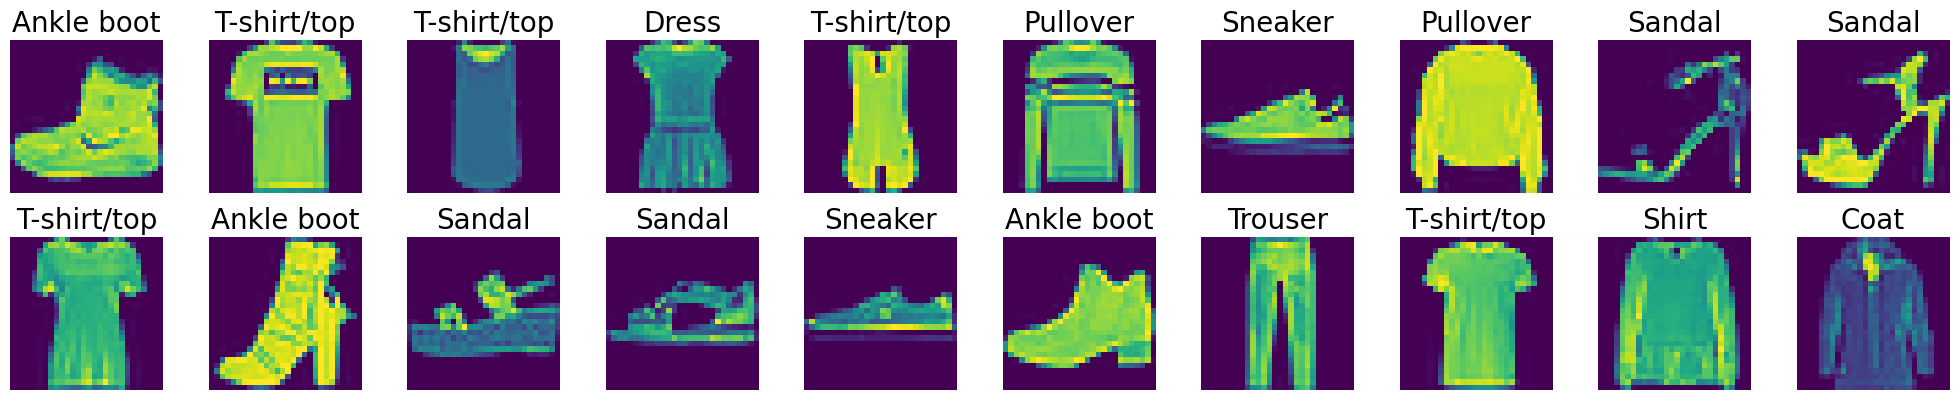

In [26]:
plt.figure(figsize=(20, 10))

for i in range (20):
    image, label = trainset[i]
    
    plt.subplot(5, 10, i+1)
    plt.imshow(image.permute(1, 2, 0))
    plt.title(class_names[label], fontsize=20)
    plt.axis('off')
    
plt.tight_layout()
plt.show()

## 3.构造CNN网络

In [11]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.net = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(64, 64, kernel_size=3),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(64 * 3 *3, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )
        
    def forward(self, x):
        return self.net(x)
    
model = CNN().to(device)

### 4.损失函数和优化器

In [12]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

### 5.训练模型

In [15]:
train_acc_list = []
val_acc_list = []

for epoch in range(10):
    model.train()
    correct = 0
    total = 0
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)
        
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)
        
    train_acc = correct / total
    train_acc_list.append(train_acc)
    print(f"Epoch [{epoch+1} / 10], Train Accuracy: {train_acc:.4f}")
    
    #验证
    model.eval()
    correct =0
    total = 0
    with torch.no_grad():
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)
            
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
    val_acc = correct / total
    val_acc_list.append(val_acc)
    print(f"Validation Accuracy: {val_acc: .4f}")

Epoch [1 / 10], Train Accuracy: 0.8789
Validation Accuracy:  0.8756
Epoch [2 / 10], Train Accuracy: 0.8905
Validation Accuracy:  0.8906
Epoch [3 / 10], Train Accuracy: 0.9004
Validation Accuracy:  0.8946
Epoch [4 / 10], Train Accuracy: 0.9084
Validation Accuracy:  0.9009
Epoch [5 / 10], Train Accuracy: 0.9123
Validation Accuracy:  0.9032
Epoch [6 / 10], Train Accuracy: 0.9188
Validation Accuracy:  0.9054
Epoch [7 / 10], Train Accuracy: 0.9243
Validation Accuracy:  0.9060
Epoch [8 / 10], Train Accuracy: 0.9286
Validation Accuracy:  0.9037
Epoch [9 / 10], Train Accuracy: 0.9329
Validation Accuracy:  0.9027
Epoch [10 / 10], Train Accuracy: 0.9361
Validation Accuracy:  0.9098


### 6.可视化准确率

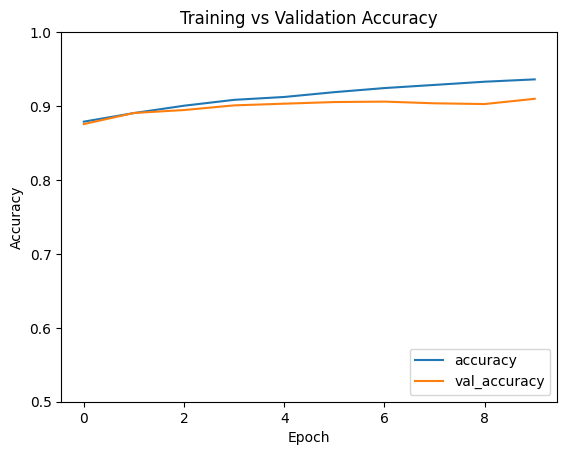

In [20]:
plt.plot(train_acc_list, label='accuracy')
plt.plot(val_acc_list, label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title('Training vs Validation Accuracy')
plt.show()

### 7.预测样例

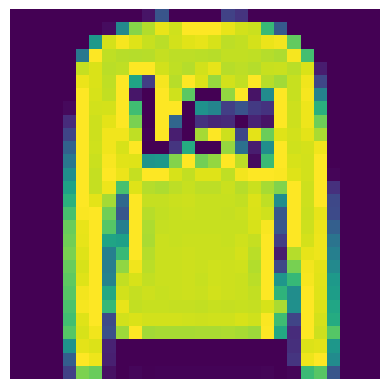

预测结果： Pullover


In [23]:
test_image, test_label = testset[1]

#显示图像
plt.imshow(test_image.permute(1, 2, 0))
plt.axis('off')
plt.show()

#预测样例
model.eval()
with torch.no_grad():
    output = model(test_image.unsqueeze(0))
    pred = torch.argmax(output, dim=1).item()
print("预测结果：", class_names[pred])